# LIF Model

The leaky-integrate-and-fire (LIF) neuron

$$ \tau_m \frac{d}{dt} V(t) = E_L - V(t) + R \; I(t)$$

Build the potential:
$$ \tau_m \frac{V(t + \Delta t)-V(t)}{\Delta t}  = E_L - V(t) + R \; I(t) = K(t)$$

then,

$$ V(t + \Delta t) = V(t) +\Delta t \frac{K(t)}{\tau_m}$$ 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
E_L = -60e-3      # milivolt
V_r = -70e-3      # milivolt
V_th = -50e-3     # milivolt
R = 100e6        # ohm
i_mean = 25e-11  # ampere

In [21]:
i_mean = 25e-11
def generate_time_array(t_init=0,tmax=150e-3,dt=1e-3):
    return np.arange(t_init, tmax, dt)

def sinusoidal_current(time_array, i_mean):
    constant = 2 * (np.pi / 0.01)
    
    # Adding Gaussian noise with mean 0 and standard deviation 0.1 times the mean value
    noise = np.random.normal(0, 0.2 * i_mean, time_array.shape)
    
    return i_mean * (1 + np.sin(constant * time_array))+noise

def potential(time_array,current,tau,E_L,R,V_th,V_r,dt):
    V_t = np.zeros(time_array.shape[0])
    V_t[0] = E_L
    
    for i in range(1,V_t.shape[0]):
        V_t[i] = V_t[i-1] + dt*(E_L-V_t[i-1] + R*current[i-1])/tau
        
        if V_t[i] > V_th:
            V_t[i] = V_r
        
    return V_t

In [22]:
time_array = generate_time_array()

neuro_current = sinusoidal_current(time_array,i_mean)

V_t = potential(time_array,neuro_current,tau,E_L,R,V_th,V_r,dt)


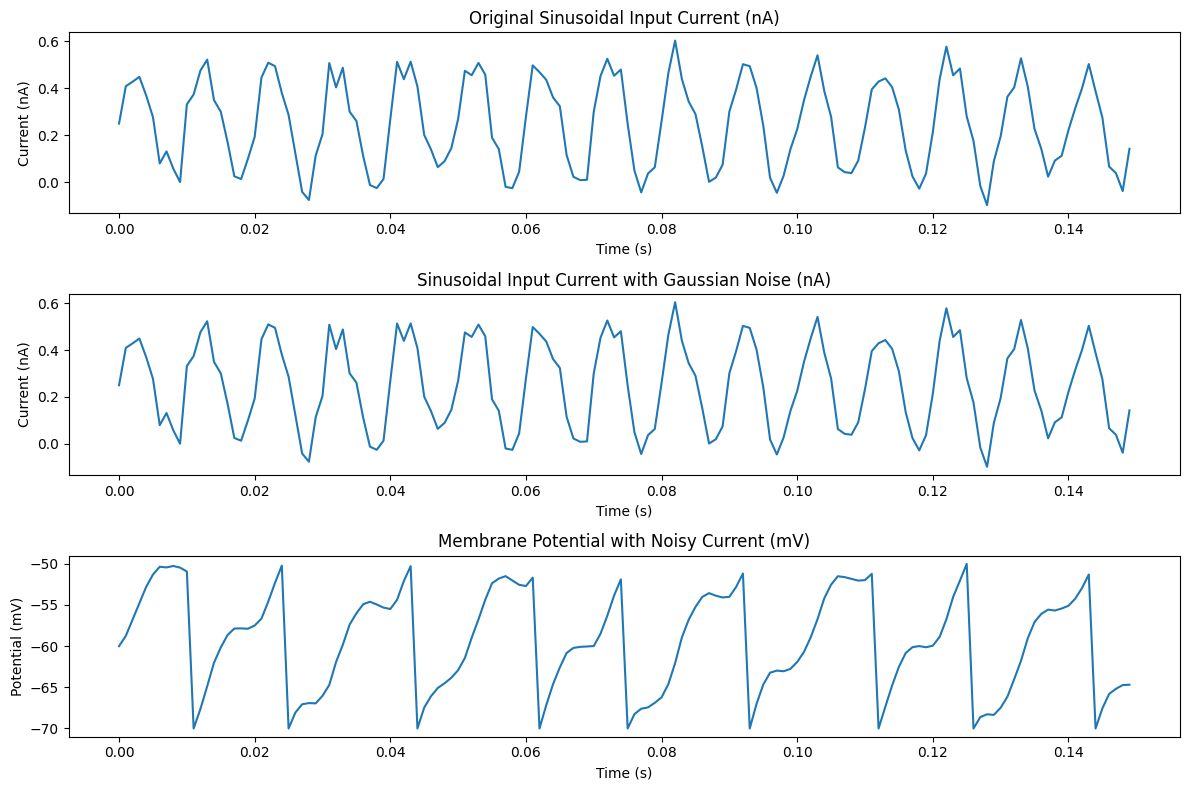

In [23]:
# Plot the results with noise
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time_array, neuro_current * 1e9)  # Plot the original current for comparison
plt.title('Original Sinusoidal Input Current (nA)')
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.subplot(3, 1, 2)
plt.plot(time_array, neuro_current * 1e9)  # Convert amperes to nanoamperes for plotting
plt.title('Sinusoidal Input Current with Gaussian Noise (nA)')
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.subplot(3, 1, 3)
plt.plot(time_array, V_t * 1e3)  # Convert volts to millivolts for plotting
plt.title('Membrane Potential with Noisy Current (mV)')
plt.xlabel('Time (s)')
plt.ylabel('Potential (mV)')

plt.tight_layout()
plt.show()